In [5]:
# import libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import image as img
iris = load_iris()

![Iris Dataset Classification](https://github.com/codebasics/py/raw/3a2cdbec125f53169325d1f2faa0de4866ad7320/ML/10_svm/iris_petal_sepal.png)
![Support Vectors](image-7.png)
![Upgrade Dimensions](image-8.png)

**Support vector machine draws a hyper plane in n dimension space such that it maximizes margin between classification groups**

![High Gamma vs Low Gamma](image-9.png)

![High Regularization vs Low Regularization](image-10.png)

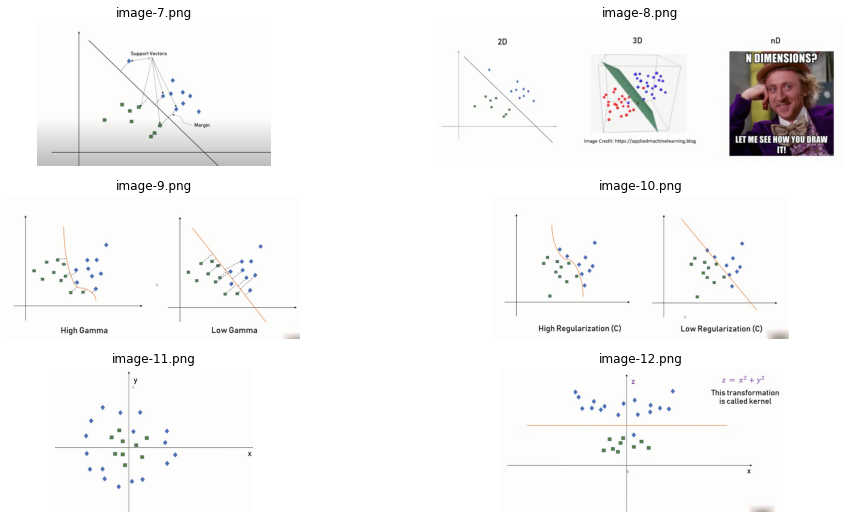

In [12]:
images = ["image-7.png", "image-8.png", "image-9.png", "image-10.png", "image-11.png", "image-12.png"]

plt.figure(figsize=(16, 9))
for index, image in enumerate(images):
    plt.subplot(3, 2, index + 1)
    plt.imshow(img.imread(image))
    plt.title(image)
    plt.axis("off")

plt.show()

In [13]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
# convert the data in nice dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# From the output, setosa=0; versicolor=1, virginica=2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df[df["target"] == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [20]:
# add the new column to recognize the flowers in better way
df["flower_name"] = df["target"].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


[]

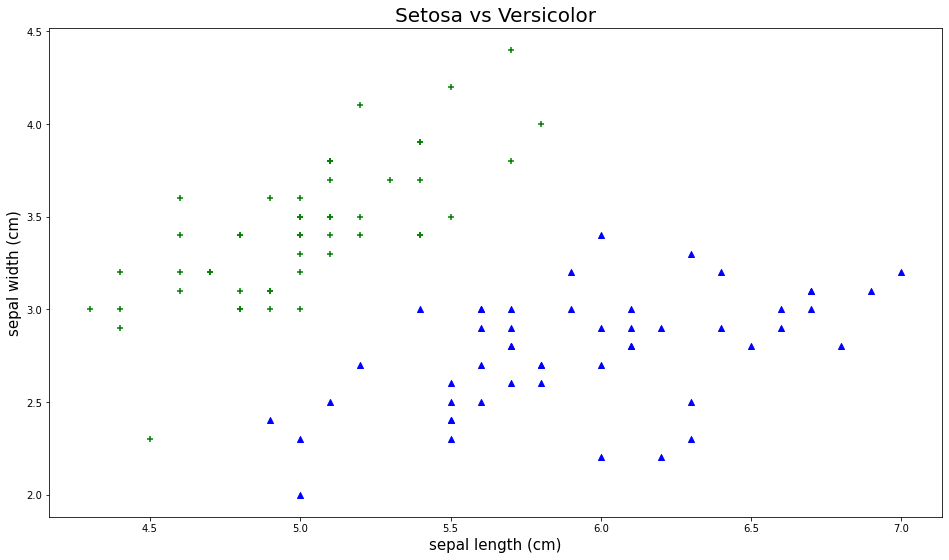

In [26]:
# data visualization
df0 = df[df["target"] == 0] # setosa dataframe
df1 = df[df["target"] == 1] # versicolor dataframe
df2 = df[df["target"] == 2] # virginica dataframe

# scallerplot
plt.figure(figsize=(16, 9))
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker="^")
plt.xlabel("sepal length (cm)", fontsize=15)
plt.ylabel("sepal width (cm)", fontsize=15)
plt.title("Setosa vs Versicolor", fontsize=20)
plt.plot()

[]

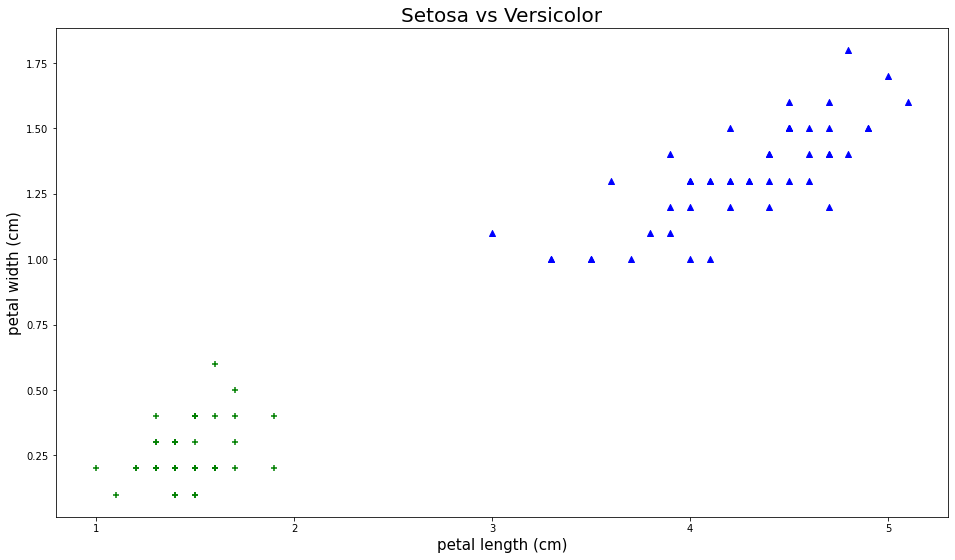

In [27]:
plt.figure(figsize=(16, 9))
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker="^")
plt.xlabel("petal length (cm)", fontsize=15)
plt.ylabel("petal width (cm)", fontsize=15)
plt.title("Setosa vs Versicolor", fontsize=20)
plt.plot()

In [29]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target", "flower_name"], axis=1)
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create Support Vector Classifier model
from sklearn.svm import SVC
model = SVC(C=10, gamma=100, kernel='linear')
# train the model
model.fit(X_train, y_train)
# evaluate the model
model.score(X_test, y_test)

1.0